# Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [177]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1) Primary Fuel  

In [431]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [432]:
data.shape

(907, 27)

So there are 907 rows and 27 columns

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [434]:

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see there any many null values , with some of features with 300+ null so we cant fill the nan values , so we gonna drop them  

In [435]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [436]:
data = data.drop(columns = ['country', 'country_long', 'name', 'gppd_idnr','other_fuel1', 'other_fuel2',
       'other_fuel3','owner','url','wepp_id','estimated_generation_gwh'])

In [437]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      888 non-null    object 
 7   year_of_capacity_data   519 non-null    float64
 8   generation_gwh_2013     0 non-null      float64
 9   generation_gwh_2014     398 non-null    float64
 10  generation_gwh_2015     422 non-null    float64
 11  generation_gwh_2016     434 non-null    float64
 12  generation_gwh_2017     440 non-null    float64
 13  generation_gwh_2018     448 non-null    float64
 14  generation_gwh_2019     0 non-null      fl

Lets fill nan values 

# Classification model

In [439]:
data['primary_fuel'].nunique()

8

# Regression Model 

In [440]:
data['capacity_mw'].nunique()

361

In [441]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

Lets fill Nan 

Filling generation_gwh with reference to capacity_mw as data is continous

In [442]:
data.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [443]:
data = data.drop(columns = ['generation_gwh_2013','generation_gwh_2019'])

In [444]:
imputer = IterativeImputer()
data[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = imputer.fit_transform(data[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,1288.670952,1342.448818,1186.373783,1064.675602,925.269267,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [445]:
data.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [446]:
data[['capacity_mw','latitude','longitude']] = imputer.fit_transform(data[['capacity_mw','latitude','longitude']])

In [447]:
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [448]:
data['generation_data_source'] = data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [449]:
data.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

In [450]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [451]:
from sklearn.preprocessing import LabelEncoder

In [452]:
le = LabelEncoder()
data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

In [453]:
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [454]:
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [455]:
cat_impute = IterativeImputer(initial_strategy = 'most_frequent')
data[['primary_fuel','commissioning_year','year_of_capacity_data']] = cat_impute.fit_transform(data[['primary_fuel','commissioning_year','year_of_capacity_data']])

In [456]:
data[['commissioning_year','year_of_capacity_data']] = round(data[['commissioning_year','year_of_capacity_data']],0)

In [457]:
data.isna().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [458]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.190767,77.442370,3.206174,1992.377067,2019.0,1773.578548,1849.761436,1818.737371,1814.152392,1798.220471
std,590.085456,6.079241,4.813447,2.280652,16.945799,0.0,2748.972481,2928.820019,2951.021323,3014.506369,3140.272186
min,0.000000,8.168900,68.644700,0.000000,1927.000000,2019.0,-627.793950,-743.690999,0.000000,-77.227020,-171.843616
25%,16.725000,17.072000,74.388900,1.000000,1978.000000,2019.0,665.933600,664.038125,703.619225,804.900275,810.733240
50%,59.200000,21.302700,76.929453,3.000000,1995.000000,2019.0,1301.702730,1357.336418,1210.791345,1093.615276,961.673272
75%,385.250000,25.176450,79.206100,6.000000,2008.000000,2019.0,1360.420626,1419.629272,1316.665894,1255.990270,1185.086000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    float64
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      907 non-null    object 
 7   year_of_capacity_data   907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(11), object(3)
memory usage: 99

lets change the data type into float

In [460]:
data['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [461]:
le = LabelEncoder()
data['source'] = le.fit_transform(data['source'])

In [462]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [463]:
le = LabelEncoder()
data['geolocation_source'] = le.fit_transform(data['geolocation_source'])

In [464]:
data['generation_data_source'].unique()

array(['Central Electricity Authority'], dtype=object)

as generation_data_source has only one unique value we can drop it 

In [465]:
data.drop('generation_data_source',axis=1)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109,1,2019.0,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1.0,2004.0,174,2,2019.0,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7.0,1973.0,21,2,2019.0,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2.0,2004.0,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22,2,2019.0,446.714974,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,1978.0,77,0,2019.0,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,25.5,15.2758,75.5811,7.0,1973.0,21,2,2019.0,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,80.0,24.3500,73.7477,1.0,2004.0,59,2,2019.0,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    float64
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    int32  
 6   geolocation_source      907 non-null    int32  
 7   year_of_capacity_data   907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(11), int32(2), object(1)
memory

Now data is clean 

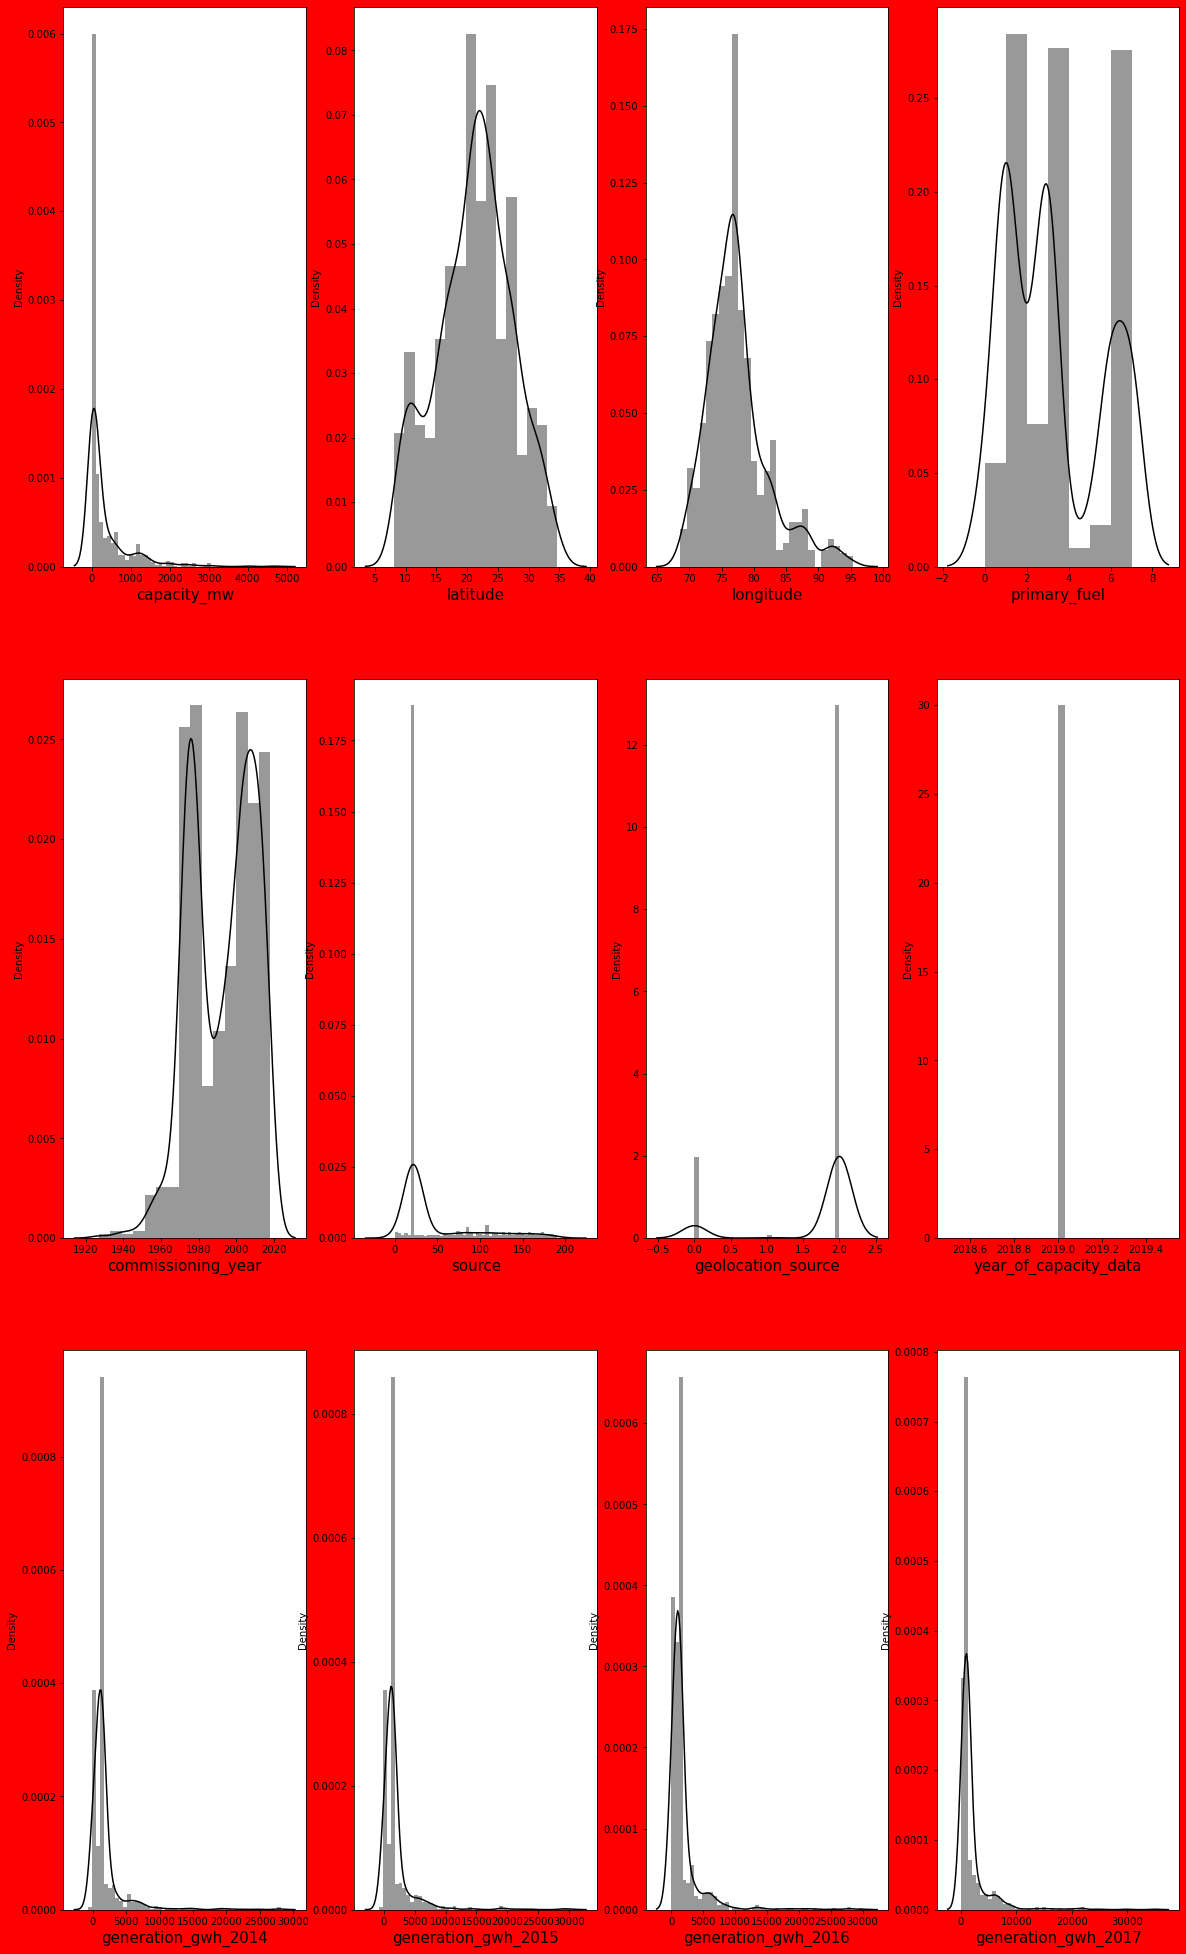

In [467]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [468]:
data.drop('year_of_capacity_data',axis=1,inplace=True) #has it has only 1 data
data.drop('generation_data_source',axis=1,inplace=True) 

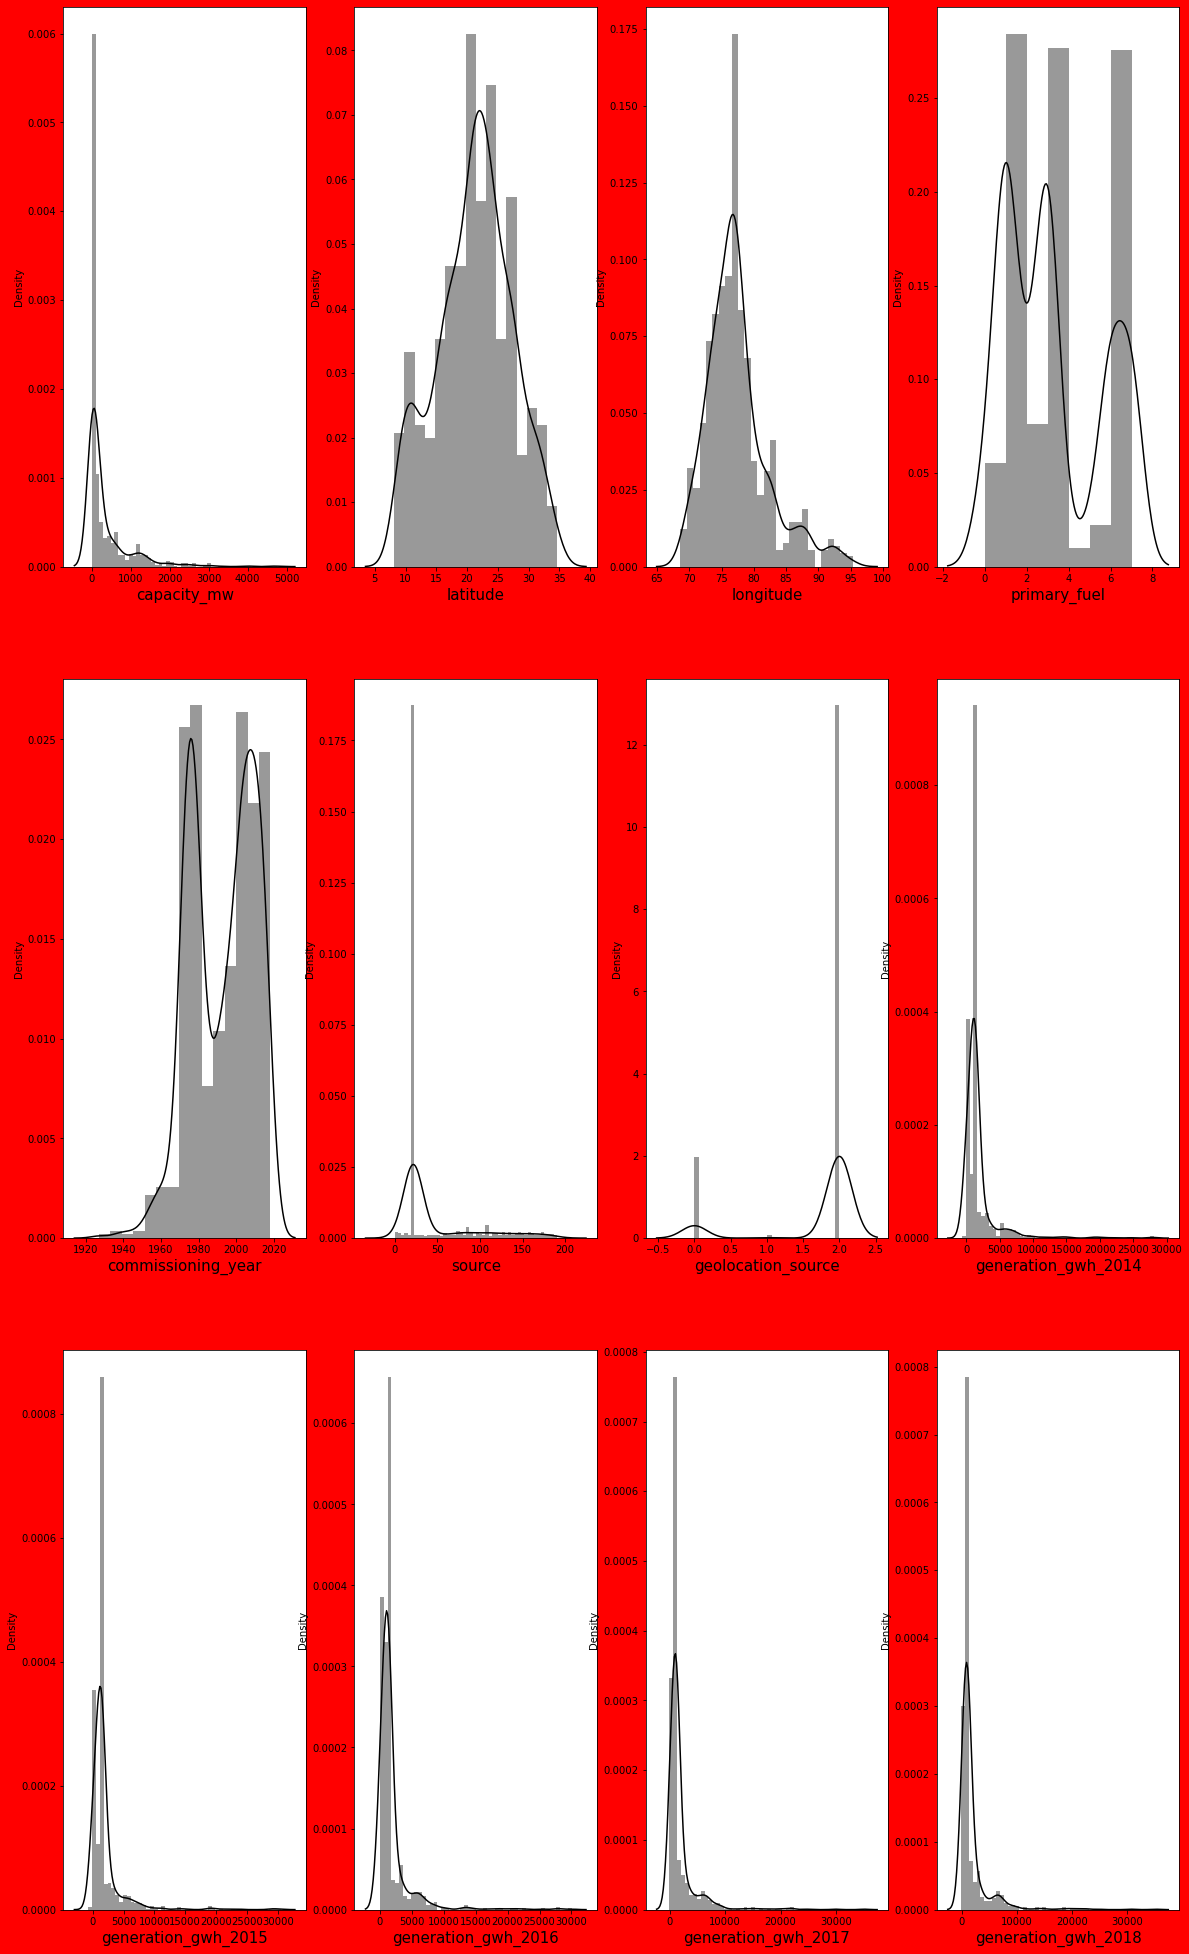

In [469]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

we can see skewness in many columns

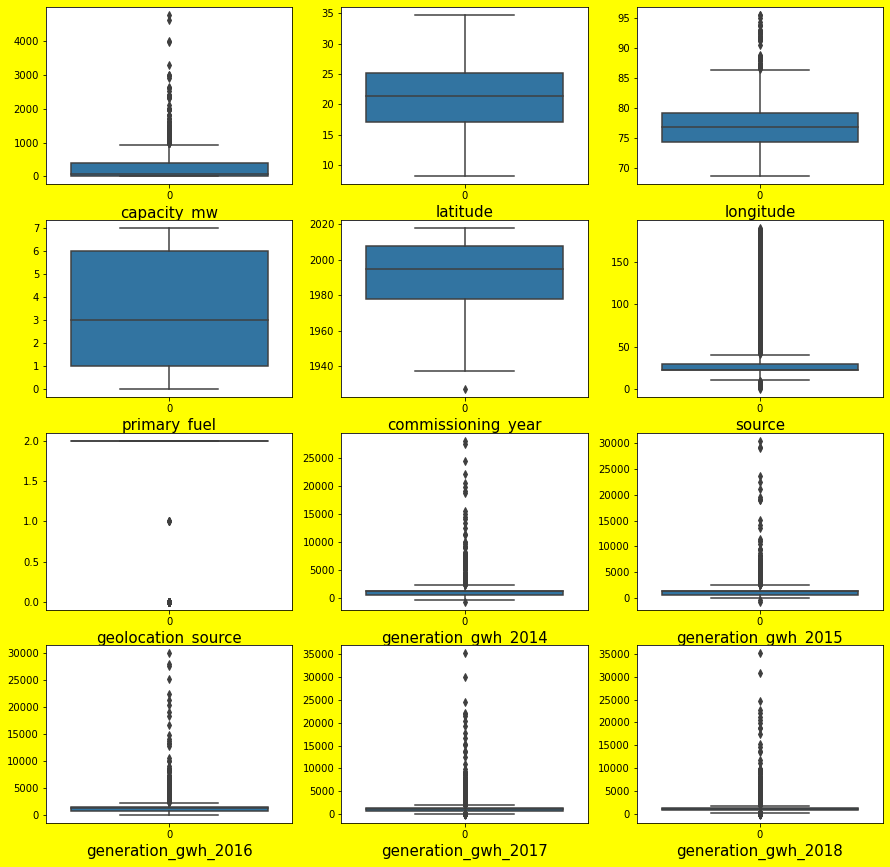

In [470]:
plt.figure(figsize=(15,15),facecolor='yellow')
graph=1
for column in data:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

we can see outliers 

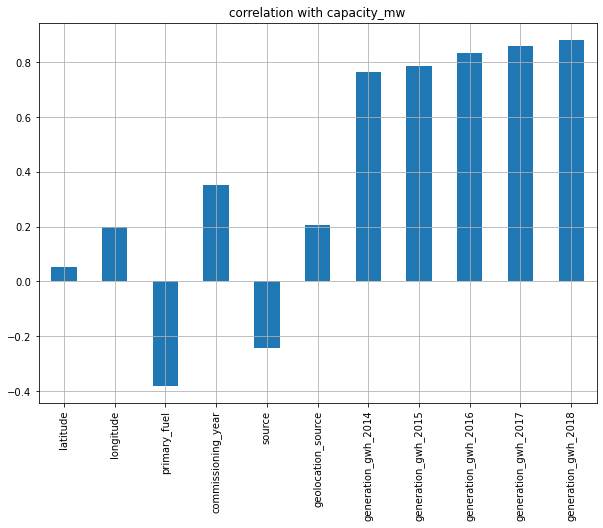

In [471]:
data.drop('capacity_mw',axis=1).corrwith(data.capacity_mw).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with capacity_mw')
plt.show()

In [472]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Generation_gwth is highly correlated 

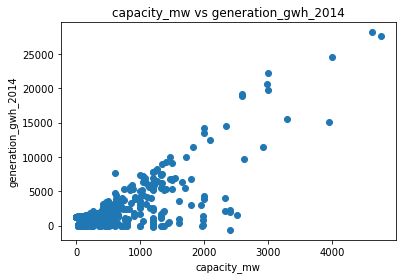

In [473]:
plt.scatter(data.capacity_mw,data.generation_gwh_2014)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2014')
plt.title('capacity_mw vs generation_gwh_2014')
plt.show()

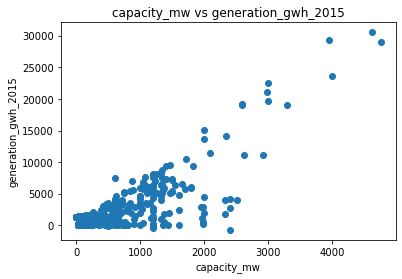

In [474]:
plt.scatter(data.capacity_mw,data.generation_gwh_2015)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2015')
plt.title('capacity_mw vs generation_gwh_2015')
plt.show()

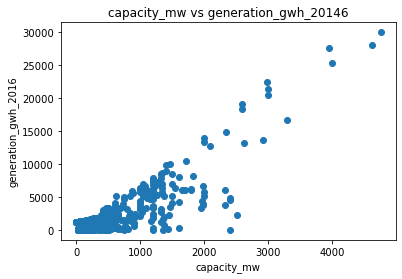

In [475]:
plt.scatter(data.capacity_mw,data.generation_gwh_2016)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2016')
plt.title('capacity_mw vs generation_gwh_20146')
plt.show()

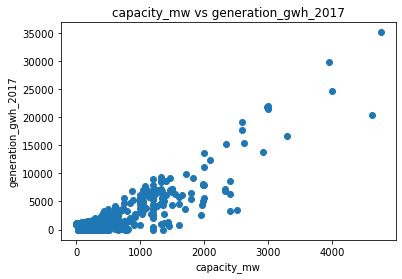

In [476]:
plt.scatter(data.capacity_mw,data.generation_gwh_2017)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2017')
plt.title('capacity_mw vs generation_gwh_2017')
plt.show()

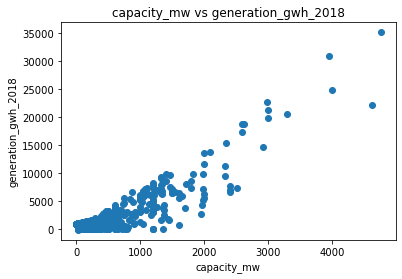

In [477]:
plt.scatter(data.capacity_mw,data.generation_gwh_2018)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2018')
plt.title('capacity_mw vs generation_gwh_2018')
plt.show()

Lets remove outliers and skewness

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    float64
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(10), int32(2)
memory usage: 78.1 KB


In [479]:
data['source'] = data['source'].astype(float)

In [480]:
data['geolocation_source'] = data['geolocation_source'].astype(float)

In [481]:
from scipy.stats import zscore
z_score= zscore(data)
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,267.351580,21.109493,77.086077,3.288575,1992.075383,42.376914,1.729093,1477.673336,1528.760729,1490.966482,1472.703006,1429.657301
std,421.552119,6.168938,4.330747,2.294451,16.775894,41.848494,0.681365,1502.915668,1533.096398,1581.173732,1644.433532,1701.254968
min,0.000000,8.168900,68.644700,0.000000,1943.000000,0.000000,0.000000,-221.238198,-483.625908,0.000000,-77.227020,-171.843616
25%,16.500000,16.923800,74.327200,1.000000,1978.000000,22.000000,2.000000,617.789264,639.785000,675.724400,711.604100,689.008000
50%,51.000000,21.226100,76.790900,3.000000,1994.000000,22.000000,2.000000,1300.654196,1355.769302,1210.107653,1093.615276,958.976679
75%,330.000000,25.152100,78.933300,6.000000,2008.000000,28.000000,2.000000,1359.821463,1416.886819,1299.549600,1230.210536,1131.288970
max,2000.000000,34.649000,91.823900,7.000000,2018.000000,177.000000,2.000000,9983.018000,10422.690000,10503.882000,9833.690000,9859.500000


In [482]:
print('The data loss Percentage for removing outlier using the IQR is ', 100-((849/907)*100))

The data loss Percentage for removing outlier using the IQR is  6.394707828004414


I have tried using IQR method but lost more than 30% and z value as 2.5 i lost 22 % of data

In [483]:
data.skew()

capacity_mw            1.992469
latitude              -0.110167
longitude              0.940865
primary_fuel           0.421152
commissioning_year    -0.205914
source                 1.813162
geolocation_source    -2.134250
generation_gwh_2014    2.657549
generation_gwh_2015    2.465988
generation_gwh_2016    2.539286
generation_gwh_2017    2.484657
generation_gwh_2018    2.564759
dtype: float64

In [484]:
scaler=PowerTransformer(method='yeo-johnson')

In [485]:
data[['capacity_mw','latitude','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']] = scaler.fit_transform(data[['capacity_mw','latitude','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']].values)

In [486]:
data.skew()

capacity_mw            0.014005
latitude              -0.072884
longitude             -0.001385
primary_fuel           0.421152
commissioning_year    -0.205914
source                -0.190499
geolocation_source    -2.105908
generation_gwh_2014    0.754375
generation_gwh_2015    0.806062
generation_gwh_2016    0.025945
generation_gwh_2017    0.398901
generation_gwh_2018    0.571374
dtype: float64

i have tried log function on geolocation_source but ended up with 0 

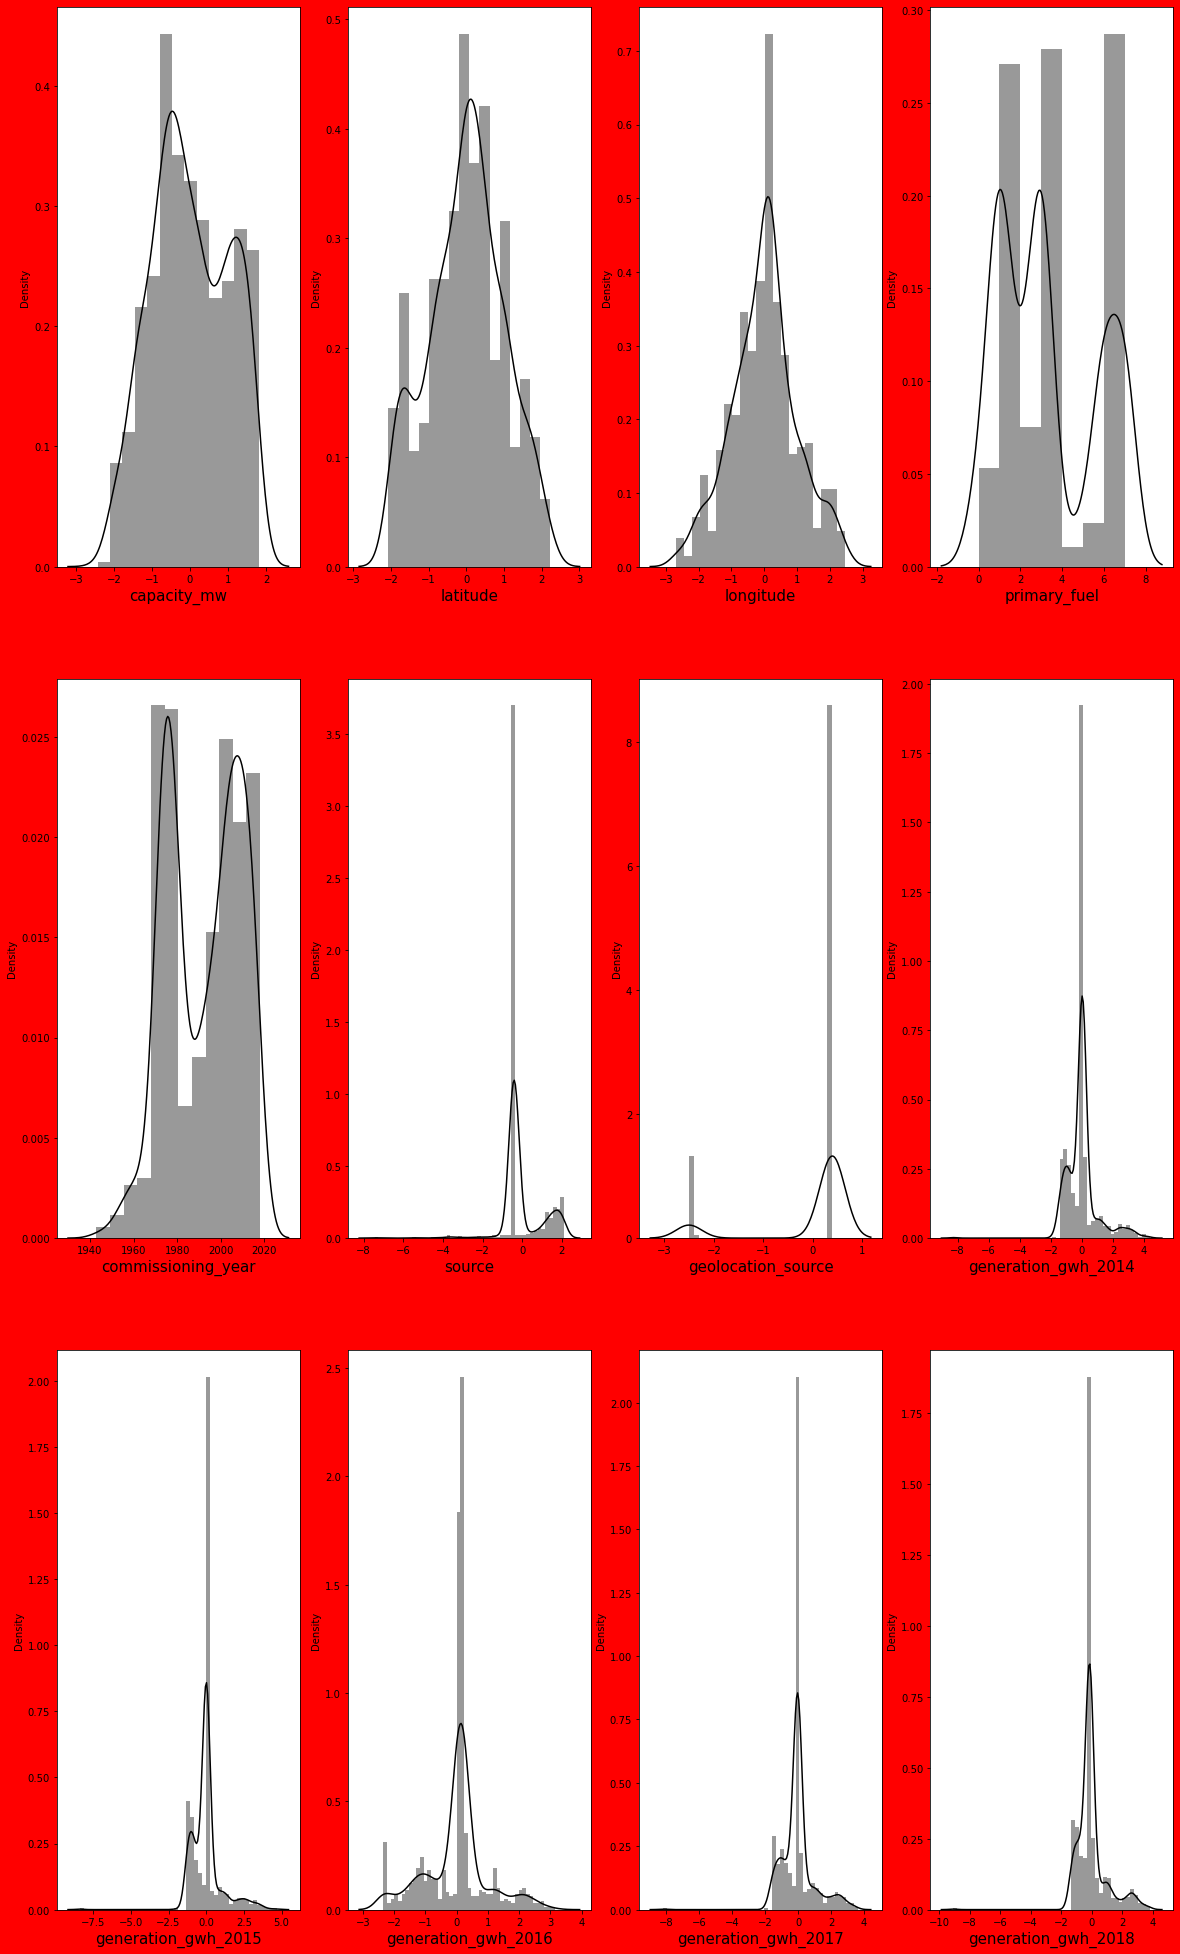

In [487]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

data doesnt look skwed anymore 

In [493]:
X=data.drop('primary_fuel',axis=1)
y=data['primary_fuel']

In [494]:
scaler=StandardScaler()

In [495]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [491]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,2.205483,capacity_mw
1,1.094468,latitude
2,1.239555,longitude
3,1.476989,commissioning_year
4,1.335787,source
5,1.628213,geolocation_source
6,6.772908,generation_gwh_2014
7,9.569904,generation_gwh_2015
8,9.445931,generation_gwh_2016
9,28.905001,generation_gwh_2017


In [492]:
data.drop('generation_gwh_2017',axis=1,inplace=True)

In [496]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,2.199251,capacity_mw
1,1.093313,latitude
2,1.235578,longitude
3,1.476937,commissioning_year
4,1.335713,source
5,1.627548,geolocation_source
6,6.766107,generation_gwh_2014
7,9.442049,generation_gwh_2015
8,6.272929,generation_gwh_2016
9,4.760844,generation_gwh_2018


We can see data is normal 

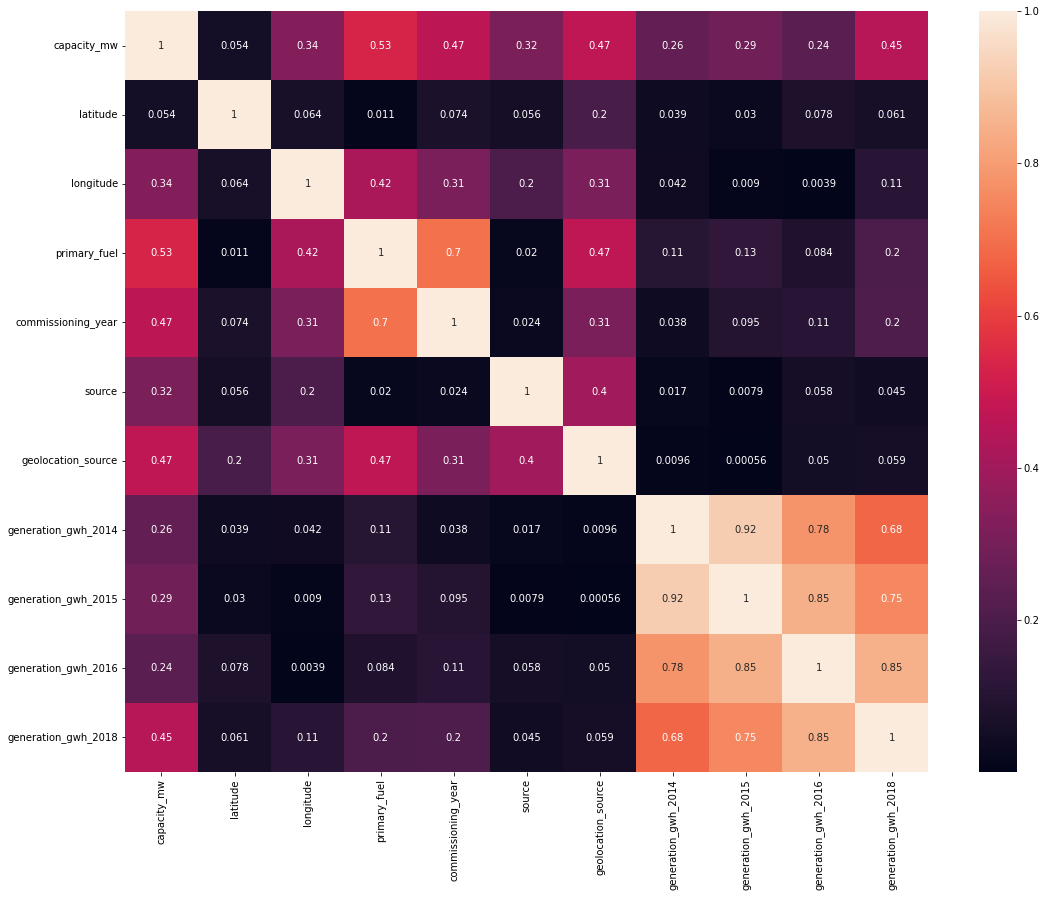

In [497]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

we can ignore generation_gwh as they are correlated with each other 

In [498]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [499]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [500]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :81.60%

===============Test Reasult=============
Accuracy SCore :77.46%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80         9
         1.0       0.70      0.82      0.75        65
         2.0       0.60      0.17      0.26        18
         3.0       0.73      0.83      0.78        54
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         5
         6.0       1.00      0.93      0.96        27
         7.0       0.91      1.00      0.95        31

    accuracy                           0.77       213
   macro avg       0.58      0.58      0.56       213
weighted avg       0.74      0.77      0.74       213



In [501]:
SVC_CVS=cross_val_score(svc,x,y,cv=10).mean()
SVC_CVS

0.8010224089635853

In [502]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
#gbdt model training and printing train and test score 
gbdt.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :87.79%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.79      0.89      0.84        65
         2.0       0.75      0.67      0.71        18
         3.0       0.90      0.85      0.88        54
         4.0       1.00      0.25      0.40         4
         5.0       0.60      0.60      0.60         5
         6.0       1.00      1.00      1.00        27
         7.0       1.00      1.00      1.00        31

    accuracy                           0.88       213
   macro avg       0.88      0.78      0.80       213
weighted avg       0.88      0.88      0.87       213



In [503]:
gbdt_csv=cross_val_score(gbdt,x,y,cv=10).mean()
gbdt_csv

0.8904481792717087

In [504]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :74.69%

===============Test Reasult=============
Accuracy SCore :74.18%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.69      0.77      0.73        65
         2.0       0.70      0.39      0.50        18
         3.0       0.69      0.74      0.71        54
         4.0       0.00      0.00      0.00         4
         5.0       1.00      0.20      0.33         5
         6.0       1.00      0.89      0.94        27
         7.0       0.83      0.94      0.88        31

    accuracy                           0.74       213
   macro avg       0.68      0.59      0.59       213
weighted avg       0.74      0.74      0.73       213



In [505]:
lr_CSV=cross_val_score(lr,x,y,cv=10).mean()
lr_CSV

0.7267226890756302

In [506]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :82.63%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90         9
         1.0       0.79      0.83      0.81        65
         2.0       0.44      0.39      0.41        18
         3.0       0.88      0.83      0.86        54
         4.0       0.00      0.00      0.00         4
         5.0       0.75      0.60      0.67         5
         6.0       1.00      1.00      1.00        27
         7.0       0.97      1.00      0.98        31

    accuracy                           0.83       213
   macro avg       0.71      0.71      0.70       213
weighted avg       0.82      0.83      0.82       213



In [507]:
DTC_csv=cross_val_score(DTC,x,y,cv=10).mean()
DTC_csv

0.8386274509803922

In [508]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :88.84%

===============Test Reasult=============
Accuracy SCore :80.75%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.53      0.89      0.67         9
         1.0       0.77      0.83      0.80        65
         2.0       0.44      0.22      0.30        18
         3.0       0.82      0.87      0.85        54
         4.0       0.00      0.00      0.00         4
         5.0       0.50      0.60      0.55         5
         6.0       1.00      0.93      0.96        27
         7.0       1.00      1.00      1.00        31

    accuracy                           0.81       213
   macro avg       0.63      0.67      0.64       213
weighted avg       0.79      0.81      0.79       213



In [509]:
knn_csv=cross_val_score(knn,x,y,cv=10).mean()
knn_csv

0.8351400560224089

In [510]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :85.92%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.74      0.94      0.83        65
         2.0       0.70      0.39      0.50        18
         3.0       0.92      0.91      0.92        54
         4.0       0.00      0.00      0.00         4
         5.0       0.33      0.20      0.25         5
         6.0       1.00      0.93      0.96        27
         7.0       1.00      1.00      1.00        31

    accuracy                           0.86       213
   macro avg       0.71      0.67      0.68       213
weighted avg       0.84      0.86      0.84       213



In [511]:
rfc_csv=cross_val_score(rfc,x,y,cv=10).mean()
rfc_csv

0.8869607843137255

In [512]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_clf=GradientBoostingClassifier()
#gbdt_clf model training and printing train and test score 
gbdt_clf.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :87.32%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.79      0.89      0.84        65
         2.0       0.73      0.61      0.67        18
         3.0       0.90      0.85      0.88        54
         4.0       0.50      0.25      0.33         4
         5.0       0.60      0.60      0.60         5
         6.0       1.00      1.00      1.00        27
         7.0       1.00      1.00      1.00        31

    accuracy                           0.87       213
   macro avg       0.82      0.78      0.79       213
weighted avg       0.87      0.87      0.87       213



In [515]:
gbdt_clf_csv=cross_val_score(gbdt_clf,x,y,cv=5).mean()
gbdt_clf_csv

0.8857500870170554

In [516]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_clf_csv --> ',gbdt_clf_csv)

********* Cross Validation Score*********
knn_csv -->  0.8351400560224089
DTC_csv -->  0.8386274509803922
lr_CSV -->  0.7267226890756302
SVC_CVS -->  0.8010224089635853
rfc_csv -->  0.8869607843137255
gbdt_clf_csv -->  0.8857500870170554


As per the Cross Validation Score Random Forest Classifier is the best model

in the above we can tune with the following but it can take more than an hour so im using less data but we can tune while running the final value 

In [517]:
params ={'n_estimators':[100,150],
        'criterion':['gini','entropy'],
        'min_samples_split':[2,3],
        'bootstrap':[True,False],}

In [518]:
from sklearn.model_selection import GridSearchCV

In [519]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs =-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [520]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 100}

In [521]:
rfc_clf=RandomForestClassifier(bootstrap = False, criterion = 'entropy',n_jobs = -2 , min_samples_split = 2,max_depth = 17,
                                n_estimators = 250) 
rfc_clf.fit(x_train,y_train)
pred=rfc_clf.predict(x_train)

In [522]:
rfc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{rfc_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=rfc_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',rfc_clf_report)


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
            0.0    1.0   2.0    3.0  4.0   5.0   6.0   7.0  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0   1.0       1.0   
support    36.0  165.0  46.0  183.0  5.0  15.0  94.0  92.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        636.0         636.0  
----------------------------------
confusion matrix:
[[ 36   0   0   0   0   0   0   0]
 [  0 165   0   0   0   0   0   0]
 [  0   0  46   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0  94   0]
 [  0   0   0   0   0  

In [523]:
print('rfc_csv --> ',rfc_csv)

rfc_csv -->  0.8869607843137255


In [524]:
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')

Accuracy Score:88.73%


we can see accuracy has been increased by adding some more features

# 2) capacity_mw

every explanation is given on classification model i.e Primary Fuel

In [525]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [526]:
data.shape

(907, 27)

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [528]:

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [529]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [530]:
data = data.drop(columns = ['country', 'country_long', 'name', 'gppd_idnr','other_fuel1', 'other_fuel2',
       'other_fuel3','owner','url','wepp_id','estimated_generation_gwh'])

In [531]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      888 non-null    object 
 7   year_of_capacity_data   519 non-null    float64
 8   generation_gwh_2013     0 non-null      float64
 9   generation_gwh_2014     398 non-null    float64
 10  generation_gwh_2015     422 non-null    float64
 11  generation_gwh_2016     434 non-null    float64
 12  generation_gwh_2017     440 non-null    float64
 13  generation_gwh_2018     448 non-null    float64
 14  generation_gwh_2019     0 non-null      fl

In [533]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [534]:
data.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [535]:
data = data.drop(columns = ['generation_gwh_2013','generation_gwh_2019'])

In [536]:
imputer = IterativeImputer()
data[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = imputer.fit_transform(data[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,1288.670952,1342.448818,1186.373783,1064.675602,925.269267,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [537]:
data.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [538]:
data[['capacity_mw','latitude','longitude']] = imputer.fit_transform(data[['capacity_mw','latitude','longitude']])

In [539]:
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [540]:
data['generation_data_source'] = data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [541]:
data.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

In [542]:
from sklearn.preprocessing import LabelEncoder

In [543]:
le = LabelEncoder()
data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

In [544]:
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [545]:
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [546]:
cat_impute = IterativeImputer(initial_strategy = 'most_frequent')
data[['primary_fuel','commissioning_year','year_of_capacity_data']] = cat_impute.fit_transform(data[['primary_fuel','commissioning_year','year_of_capacity_data']])

In [547]:
data[['commissioning_year','year_of_capacity_data']] = round(data[['commissioning_year','year_of_capacity_data']],0)

In [548]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.190767,77.442370,3.206174,1992.377067,2019.0,1773.578548,1849.761436,1818.737371,1814.152392,1798.220471
std,590.085456,6.079241,4.813447,2.280652,16.945799,0.0,2748.972481,2928.820019,2951.021323,3014.506369,3140.272186
min,0.000000,8.168900,68.644700,0.000000,1927.000000,2019.0,-627.793950,-743.690999,0.000000,-77.227020,-171.843616
25%,16.725000,17.072000,74.388900,1.000000,1978.000000,2019.0,665.933600,664.038125,703.619225,804.900275,810.733240
50%,59.200000,21.302700,76.929453,3.000000,1995.000000,2019.0,1301.702730,1357.336418,1210.791345,1093.615276,961.673272
75%,385.250000,25.176450,79.206100,6.000000,2008.000000,2019.0,1360.420626,1419.629272,1316.665894,1255.990270,1185.086000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    float64
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      907 non-null    object 
 7   year_of_capacity_data   907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(11), object(3)
memory usage: 99

In [550]:
data['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [551]:
le = LabelEncoder()
data['source'] = le.fit_transform(data['source'])

In [552]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [553]:
le = LabelEncoder()
data['geolocation_source'] = le.fit_transform(data['geolocation_source'])

In [554]:
data.drop('generation_data_source',axis=1)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109,1,2019.0,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1.0,2004.0,174,2,2019.0,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7.0,1973.0,21,2,2019.0,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2.0,2004.0,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22,2,2019.0,446.714974,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,1978.0,77,0,2019.0,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,25.5,15.2758,75.5811,7.0,1973.0,21,2,2019.0,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,80.0,24.3500,73.7477,1.0,2004.0,59,2,2019.0,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


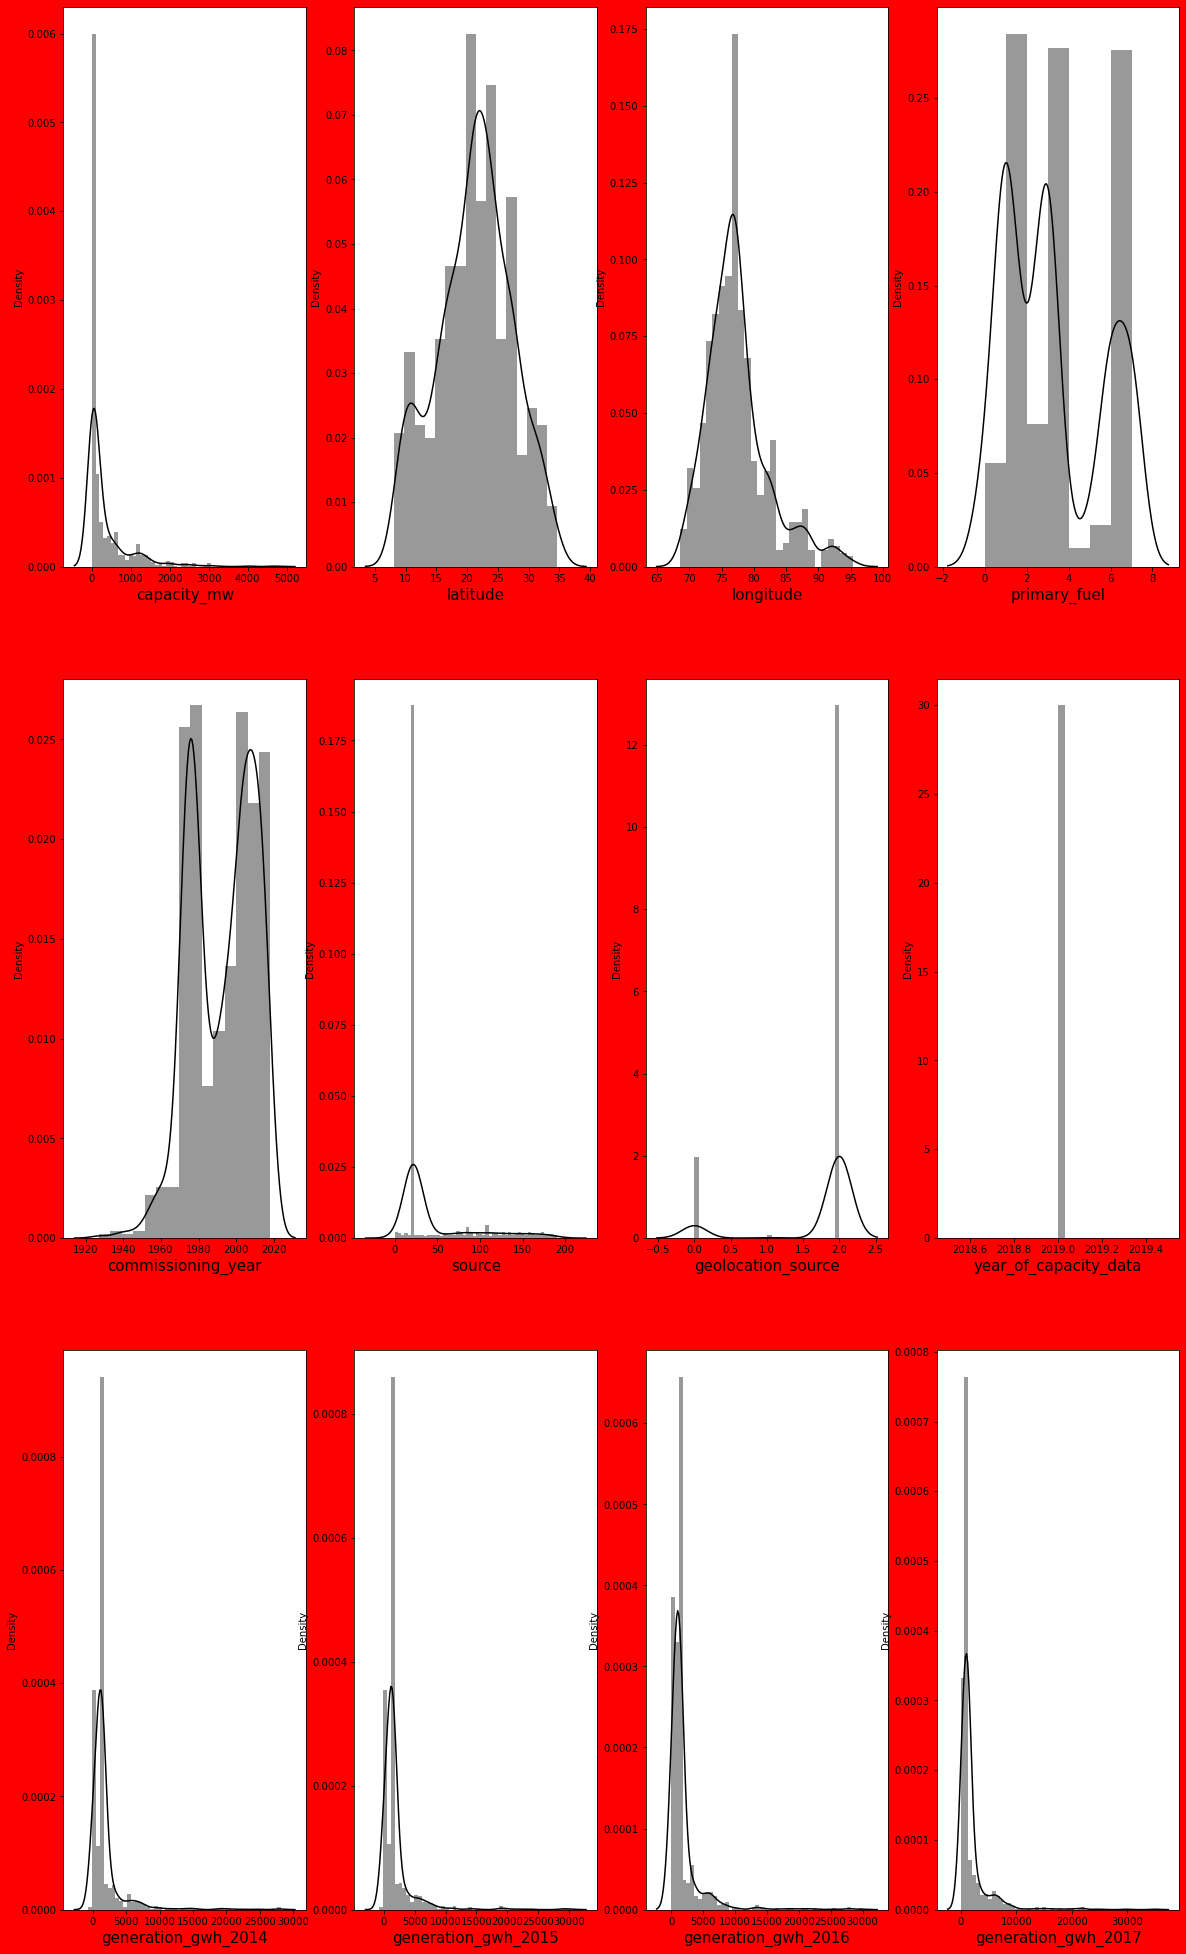

In [555]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [556]:
data.drop('year_of_capacity_data',axis=1,inplace=True) #has it has only 1 data
data.drop('generation_data_source',axis=1,inplace=True) 

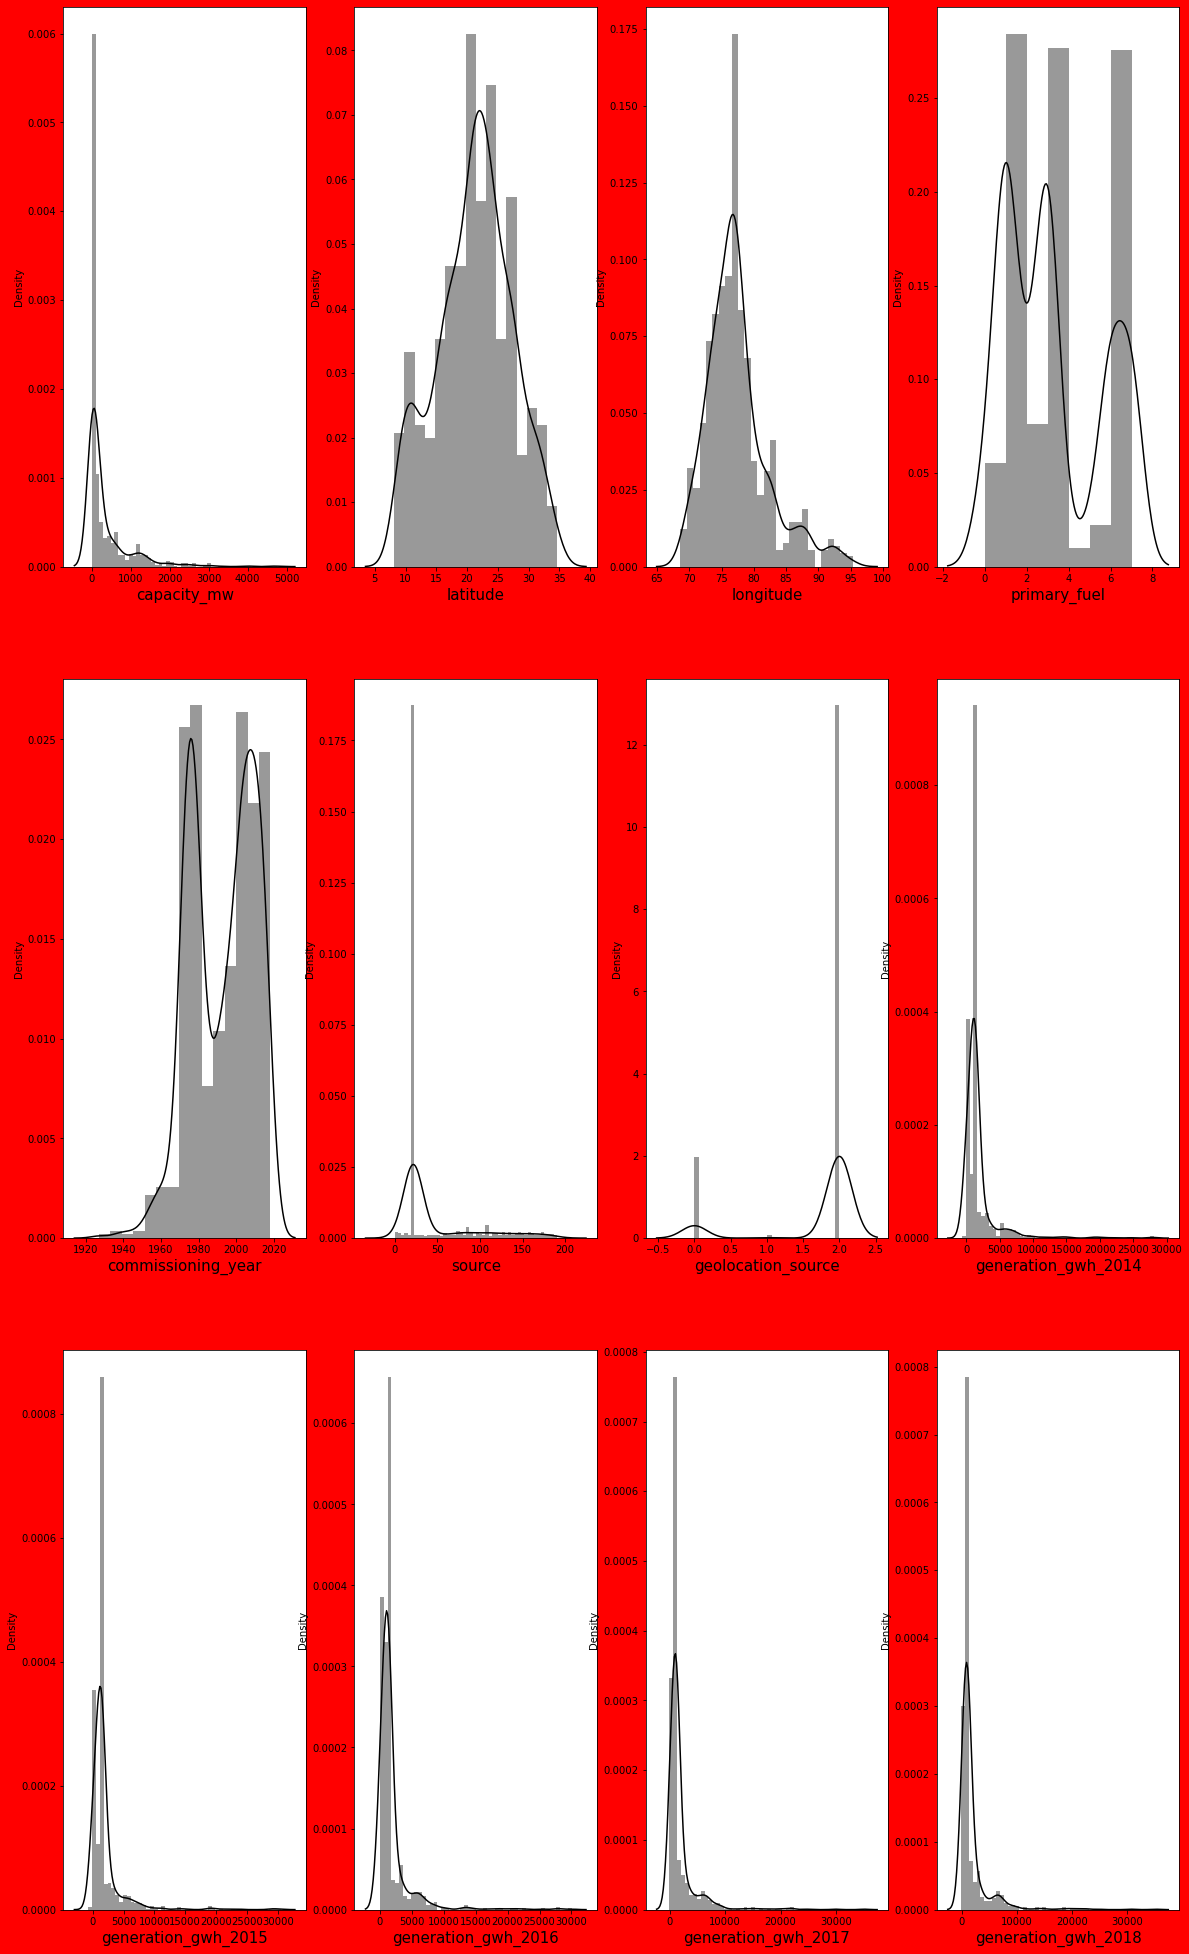

In [557]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

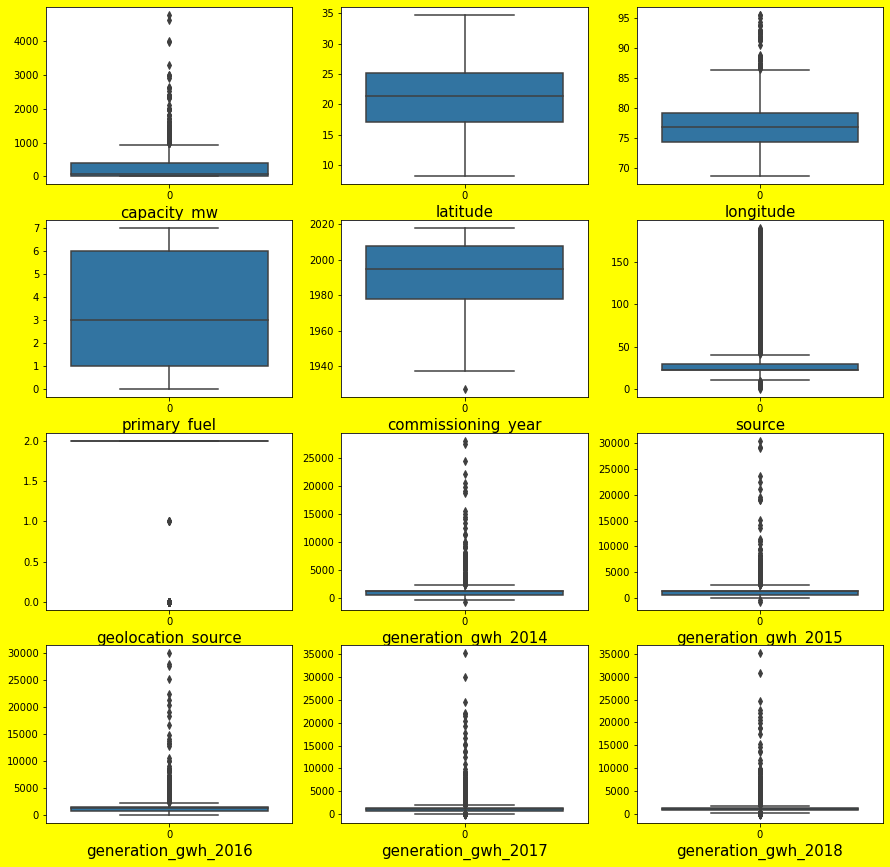

In [558]:
plt.figure(figsize=(15,15),facecolor='yellow')
graph=1
for column in data:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

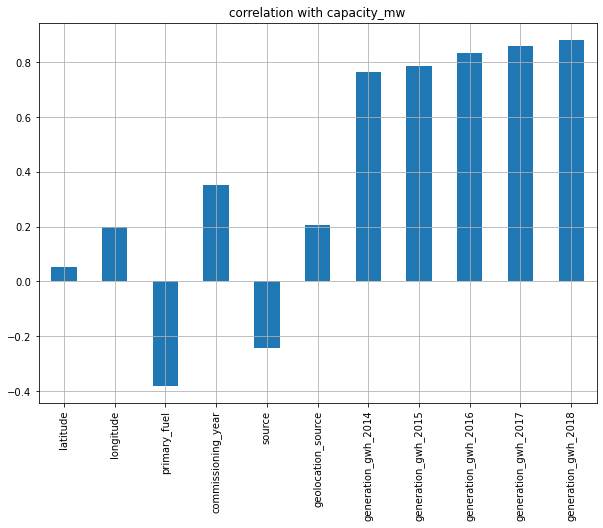

In [559]:
data.drop('capacity_mw',axis=1).corrwith(data.capacity_mw).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with capacity_mw')
plt.show()

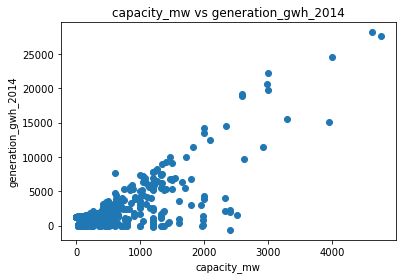

In [560]:
plt.scatter(data.capacity_mw,data.generation_gwh_2014)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2014')
plt.title('capacity_mw vs generation_gwh_2014')
plt.show()

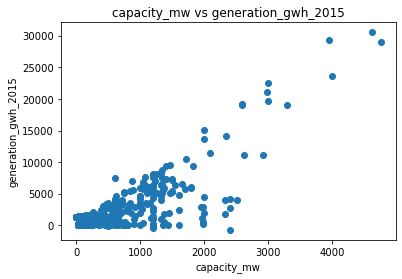

In [561]:
plt.scatter(data.capacity_mw,data.generation_gwh_2015)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2015')
plt.title('capacity_mw vs generation_gwh_2015')
plt.show()

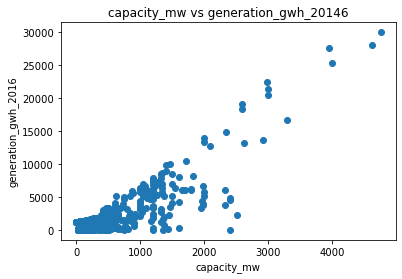

In [562]:
plt.scatter(data.capacity_mw,data.generation_gwh_2016)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2016')
plt.title('capacity_mw vs generation_gwh_20146')
plt.show()

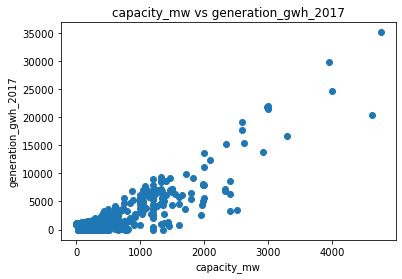

In [563]:
plt.scatter(data.capacity_mw,data.generation_gwh_2017)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2017')
plt.title('capacity_mw vs generation_gwh_2017')
plt.show()

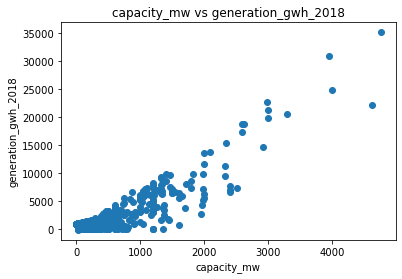

In [564]:
plt.scatter(data.capacity_mw,data.generation_gwh_2018)
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2018')
plt.title('capacity_mw vs generation_gwh_2018')
plt.show()

In [565]:
data['source'] = data['source'].astype(float)

In [566]:
data['geolocation_source'] = data['geolocation_source'].astype(float)

In [567]:
from scipy.stats import zscore
z_score= zscore(data)
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,267.351580,21.109493,77.086077,3.288575,1992.075383,42.376914,1.729093,1477.673336,1528.760729,1490.966482,1472.703006,1429.657301
std,421.552119,6.168938,4.330747,2.294451,16.775894,41.848494,0.681365,1502.915668,1533.096398,1581.173732,1644.433532,1701.254968
min,0.000000,8.168900,68.644700,0.000000,1943.000000,0.000000,0.000000,-221.238198,-483.625908,0.000000,-77.227020,-171.843616
25%,16.500000,16.923800,74.327200,1.000000,1978.000000,22.000000,2.000000,617.789264,639.785000,675.724400,711.604100,689.008000
50%,51.000000,21.226100,76.790900,3.000000,1994.000000,22.000000,2.000000,1300.654196,1355.769302,1210.107653,1093.615276,958.976679
75%,330.000000,25.152100,78.933300,6.000000,2008.000000,28.000000,2.000000,1359.821463,1416.886819,1299.549600,1230.210536,1131.288970
max,2000.000000,34.649000,91.823900,7.000000,2018.000000,177.000000,2.000000,9983.018000,10422.690000,10503.882000,9833.690000,9859.500000


I have tried using IQR method but lost more than 30% and z value as 2.5 i lost 22 % of data

In [568]:
print('The data loss Percentage for removing outlier using the IQR is ', 100-((849/907)*100))

The data loss Percentage for removing outlier using the IQR is  6.394707828004414


In [569]:
data.skew()

capacity_mw            1.992469
latitude              -0.110167
longitude              0.940865
primary_fuel           0.421152
commissioning_year    -0.205914
source                 1.813162
geolocation_source    -2.134250
generation_gwh_2014    2.657549
generation_gwh_2015    2.465988
generation_gwh_2016    2.539286
generation_gwh_2017    2.484657
generation_gwh_2018    2.564759
dtype: float64

In [570]:
scaler=PowerTransformer(method='yeo-johnson')

In [571]:
data[['capacity_mw','latitude','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']] = scaler.fit_transform(data[['capacity_mw','latitude','longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','geolocation_source']].values)

In [572]:
data.skew()

capacity_mw            0.014005
latitude              -0.072884
longitude             -0.001385
primary_fuel           0.421152
commissioning_year    -0.205914
source                -0.190499
geolocation_source    -2.105908
generation_gwh_2014    0.754375
generation_gwh_2015    0.806062
generation_gwh_2016    0.025945
generation_gwh_2017    0.398901
generation_gwh_2018    0.571374
dtype: float64

i have tried log function on geolocation_source but ended up with 0

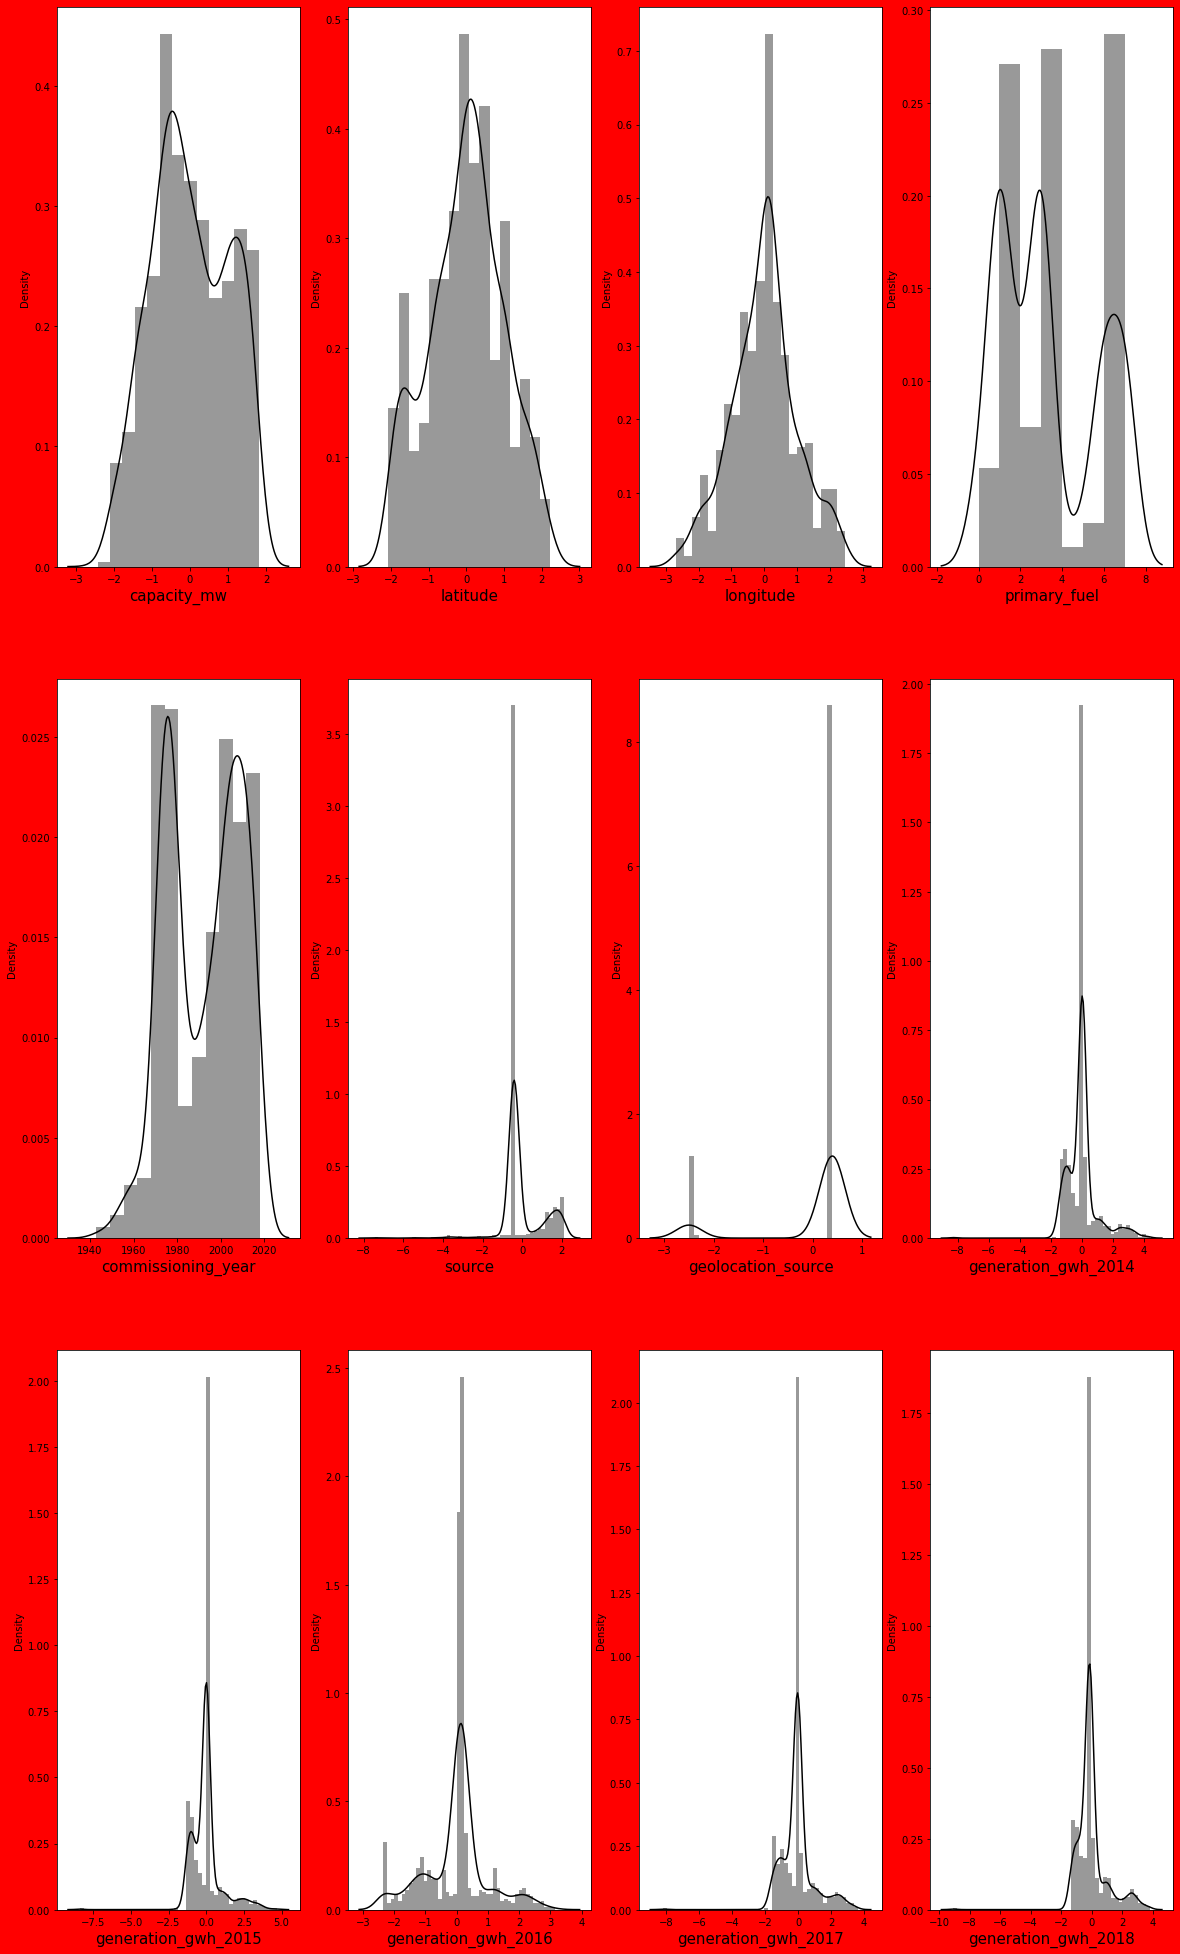

In [573]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [578]:
x=data.drop(['capacity_mw'],axis=1)
y=data['capacity_mw']

In [579]:
scaler =StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [576]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.079653,latitude
1,1.311387,longitude
2,2.602782,primary_fuel
3,2.071571,commissioning_year
4,1.328835,source
5,1.706372,geolocation_source
6,6.787909,generation_gwh_2014
7,9.568491,generation_gwh_2015
8,9.270503,generation_gwh_2016
9,28.824857,generation_gwh_2017


In [577]:
data.drop('generation_gwh_2017',axis=1,inplace=True)

In [580]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.078953,latitude
1,1.306225,longitude
2,2.602643,primary_fuel
3,2.070348,commissioning_year
4,1.328459,source
5,1.706369,geolocation_source
6,6.782894,generation_gwh_2014
7,9.437200,generation_gwh_2015
8,5.977779,generation_gwh_2016
9,4.030827,generation_gwh_2018


we can see now its normal 

In [581]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [582]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.9278734737765851
Test accuracy  -  0.9048544913786463


In [583]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=lr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.5556953993207917
Test accuracy  -  0.5639077846299401


In [584]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=dt.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 1.0
Test accuracy  -  0.9197476148598711


In [585]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=knn.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.7768406143368662
Test accuracy  -  0.6519788616496398


In [586]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.9830300223018417
Test accuracy  -  0.9300850021084774


In [587]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=svr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.02175351098484124
Test accuracy  -  0.024053565564396306


In [588]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)


Train accuracy  - 0.9921699238402746
Test accuracy  -  0.9527821845114416


As we can see Random Forest giving the best accurcy 

# TUNNING

In [589]:
from sklearn.model_selection import GridSearchCV

In [590]:
params ={'n_estimators':[100,150],
        'criterion':['mse','mae'],
        'min_samples_split':[2,3],
        'bootstrap':[True,False],
        'n_jobs':[-1,-2]}

In [591]:
RF_grid=GridSearchCV(RandomForestRegressor(),params,cv=4)

In [592]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150], 'n_jobs': [-1, -2]})

In [593]:
RF_grid.best_estimator_

RandomForestRegressor(min_samples_split=3, n_estimators=150, n_jobs=-1)

In [618]:
RF_model=RandomForestRegressor(criterion='mae', min_samples_split=6, n_jobs=-1,bootstrap='True')
RF_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap='True', criterion='mae', min_samples_split=6,
                      n_jobs=-1)

In [619]:
pred=RF_model.predict(x_test)

In [620]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 95.28307808551824


we have achieved little more accuracy by tunning 

In [621]:
import pickle

In [622]:
pickle.dump(RF_model,open('Global Power Plant Database_','wb'))